In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importing Data

In [2]:
ratingData = np.loadtxt('data.txt', dtype='int')
movieData = np.loadtxt('movies.txt', delimiter='\t', dtype='str', encoding='ISO-8859-1')

## All Ratings

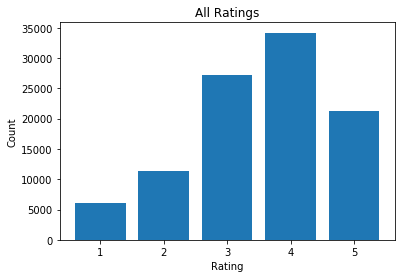

In [3]:
[ratings, counts] = np.unique(ratingData[:,2], return_counts=True)
plt.bar(ratings, counts)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("All Ratings")
plt.savefig("all-ratings.pdf")

## Most Popular Movies

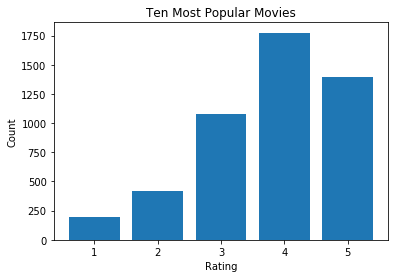

In [4]:
# Extract most popular movies and relevant rating data
[movieIDs, counts] = np.unique(ratingData[:,1], return_counts=True)
popularCountInd = np.argsort(counts)[-10:]
popularIDs = movieIDs[popularCountInd]
popularRatings = [row[2] for row in ratingData if row[1] in popularIDs]

# Plot ratings for most popular movies
[ratings, counts] = np.unique(popularRatings, return_counts=True)
plt.bar(ratings, counts)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ten Most Popular Movies")
plt.savefig("popular-ratings.pdf")

## Most Highly Rated Movies

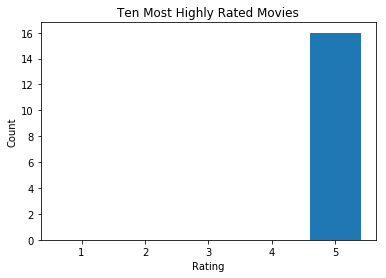

In [5]:
# Extract most highly rated movies and relevant rating data
movieIDs = np.unique(ratingData[:,1])
ratingArray = [[] for j in movieIDs]
for row in ratingData:
    ratingArray[row[1]-1].append(row[2])
averageRatings = [np.average(row) for row in ratingArray]
highlyRatedInd = np.argsort(averageRatings)[-10:]
highlyRatedIDs = movieIDs[highlyRatedInd]
highlyRatedRatings = np.array([row[2] for row in ratingData if row[1] in highlyRatedIDs])

# Plot ratings for most highly rated movies
ratings = [1,2,3,4,5]
counts = [np.sum(highlyRatedRatings==rating) for rating in ratings]
plt.bar(ratings, counts)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ten Most Highly Rated Movies")
plt.savefig("highly-rated-ratings.pdf")

## Ratings by Genre

In [6]:
def genre_plot(genreIndex, genreName):
    # Find movie IDs by genre and collect ratings
    genreMovieInd = (np.int64(movieData[:,genreIndex]) == 1)
    genreMovieIDs = np.int64(movieData[genreMovieInd, 0])
    genreRatings = [row[2] for row in ratingData if row[1] in genreMovieIDs]
    # Plot ratings
    [ratings, counts] = np.unique(genreRatings, return_counts=True)
    plt.bar(ratings, counts)
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.title(genreName + " Movies")
    plt.savefig(genreName + "-movie-ratings.pdf")
    return

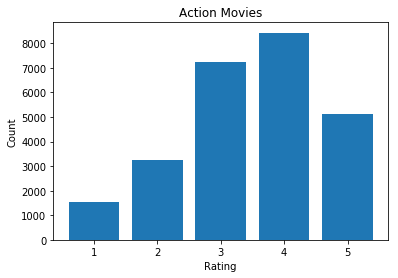

In [7]:
genre_plot(3, "Action")

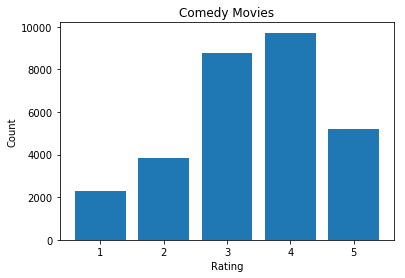

In [8]:
genre_plot(7, "Comedy")

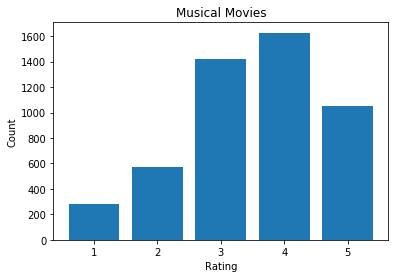

In [9]:
genre_plot(14, "Musical")